**`Introduction`:** The data set that we are using is a collection of accelerometer data taken from a smartphone that various people carried with them while conducting six different exercises (Downstairs, Jogging, Sitting, Standing, Upstairs, Walking). For each exercise the acceleration for the x, y, and z axis was measured and captured with a timestamp and person ID.

**`Problem Statement`** With this available data, we would like to train a neural network in order to understand if a person carrying a smartphone is performing any of the six activities. Once the neural network has been trained on the existing data, it should be able to correctly predict the type of activity a person is conducting when given previously unseen data.

**`Solution`** The solution to this problem is a deep neural network. Based on the available data it will learn how to differentiate between each of the six activities. We can then show new data to the neural network and it will tell us what the user is doing at any particular point in time. 

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.2.0


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Load the Dataset

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving WISDM_ar_v1.1_raw.txt to WISDM_ar_v1.1_raw.txt


In [0]:
# pd.read_csv("WISDM_ar_v1.1_raw.txt")

In [98]:
file = open("WISDM_ar_v1.1_raw.txt")
lines = file.readlines()
print(lines[0:5])

processedList = []
for i, line in enumerate(lines):
    try:
        line = line.split(",")
        last = line[5].split(";")[0] # split at 6th column and remove ; and then read the first value
        last = last.strip() # remove if there is any white spaces
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print("Error at line number: ", i)

['33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286\n', '33,Jogging,49106062271000,5.012288,11.264028,0.95342433\n', '33,Jogging,49106112167000,4.903325,10.882658,-0.08172209\n', '33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172\n', '33,Jogging,49106332290000,-1.1849703,12.108489,7.205164\n']
Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [99]:
print(processedList[0:5])

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'], ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'], ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'], ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'], ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164']]


In [100]:
## 
cols = ['user', 'activity', 'time', 'x', 'y', 'z']

data = pd.DataFrame(data = processedList, columns = cols)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [101]:
## Shape of data
data.shape

(343416, 6)

In [102]:
## Infromation or type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [103]:
## Converting x, y and x to float type -- Numeric
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

# check information again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [104]:
## check for null or NaN
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [105]:
## Data distribution
data['activity'].value_counts(dropna = False)

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [106]:
## Check the number of activities by each user
data['user'].value_counts()

20    35599
27    34958
29    34323
13    34255
36    32261
32    30778
18    29390
15    28154
6     27316
33    24593
35    19726
11     6199
17     5864
Name: user, dtype: int64

### Exploratory Data Analysis

In [107]:
data.columns

Index(['user', 'activity', 'time', 'x', 'y', 'z'], dtype='object')

In [108]:
table_data = pd.crosstab(index = data['user'],
                         columns = data['activity']
                         )
display(table_data)

"""
User 13: There 4241 time windows, where the user 13 is downstairs and each time window is 50 ms
"""

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
11,0,0,0,0,0,6199
13,4241,12329,0,0,4638,13047
15,1762,12799,0,0,2064,11529
17,0,2887,0,0,0,2977
18,2415,11992,0,0,2425,12558
20,4673,12948,0,0,4844,13134
27,3460,12038,2099,1630,3255,12476
29,4329,12788,0,0,4786,12420
32,2343,12245,0,0,3814,12376


'\nUser 13: There 4241 time windows, where the user 13 is downstairs and each time window is 50 ms\n'

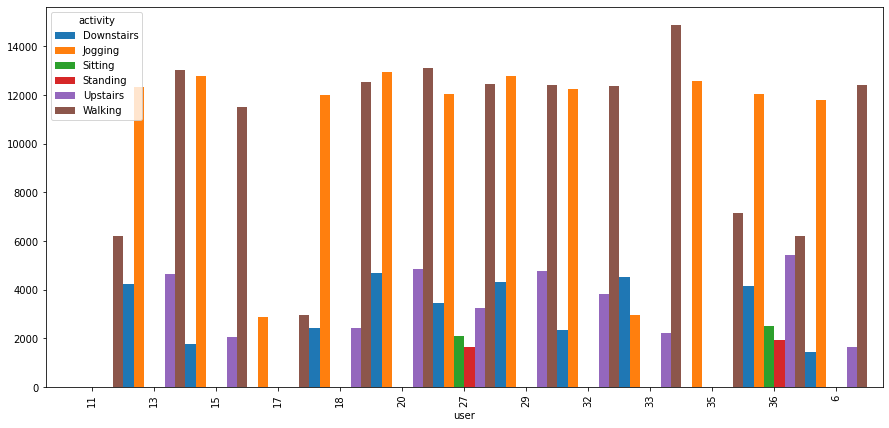

In [109]:
## Display
# sns.co
table_data.plot(kind = 'bar',
                figsize = (15, 7),
                stacked = False,
                width = 1)

In [110]:
## Actual time spend by users in each actvitiy

table_data_sec = table_data * 0.05 ## each time window is 50 ms
table_data_sec

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
11,0.00,0.00,0.00,0.00,0.00,309.95
13,212.05,616.45,0.00,0.00,231.90,652.35
15,88.10,639.95,0.00,0.00,103.20,576.45
17,0.00,144.35,0.00,0.00,0.00,148.85
18,120.75,599.60,0.00,0.00,121.25,627.90
20,233.65,647.40,0.00,0.00,242.20,656.70
27,173.00,601.90,104.95,81.50,162.75,623.80
29,216.45,639.40,0.00,0.00,239.30,621.00
32,117.15,612.25,0.00,0.00,190.70,618.80


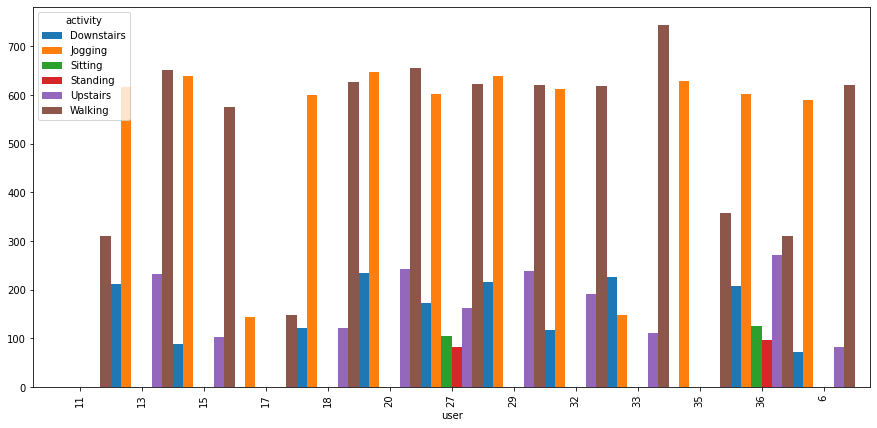

In [111]:
table_data_sec.plot(kind = 'bar',
                figsize = (15, 7),
                stacked = False,
                width = 1)

In [112]:
table_data_sec['Active'] = table_data_sec['Downstairs'] + table_data_sec['Jogging'] + table_data_sec['Upstairs']+ table_data_sec['Walking']
table_data_sec['Passive'] = table_data_sec['Sitting'] + table_data_sec['Standing']
table_data_sec

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking,Active,Passive
user,,,,,,,,
11,0.00,0.00,0.00,0.00,0.00,309.95,309.95,0.00
13,212.05,616.45,0.00,0.00,231.90,652.35,1712.75,0.00
15,88.10,639.95,0.00,0.00,103.20,576.45,1407.70,0.00
17,0.00,144.35,0.00,0.00,0.00,148.85,293.20,0.00
18,120.75,599.60,0.00,0.00,121.25,627.90,1469.50,0.00
20,233.65,647.40,0.00,0.00,242.20,656.70,1779.95,0.00
27,173.00,601.90,104.95,81.50,162.75,623.80,1561.45,186.45
29,216.45,639.40,0.00,0.00,239.30,621.00,1716.15,0.00
32,117.15,612.25,0.00,0.00,190.70,618.80,1538.90,0.00


###
- Dataset is imbalance since walking and jogging are contributing the most. Therefore it need to be balanced.

- Let’s take a look at the accelerometer data for each of the three axis for all six possible activities. The data is recorded at a sampling rate of 20 Hz (20 values per second). Since we show the first 180 records, each chart shows a 10 second interval for each of the six activities (calculation: 0.05 * 200 = 10 seconds).

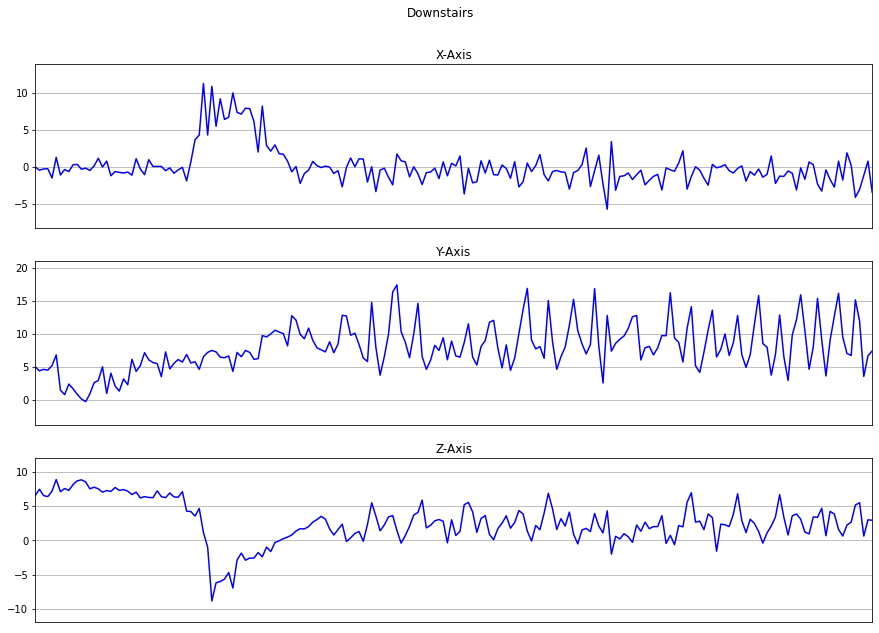

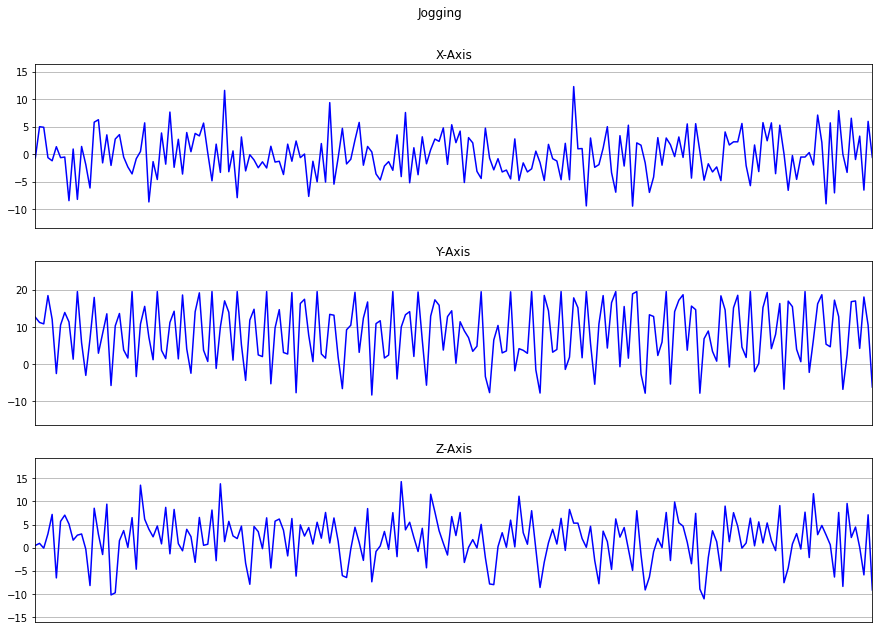

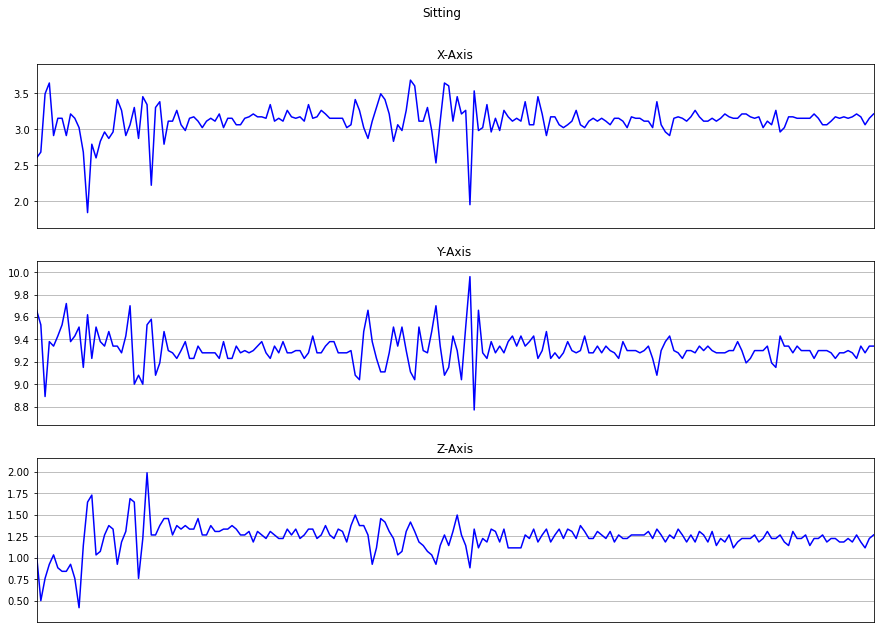

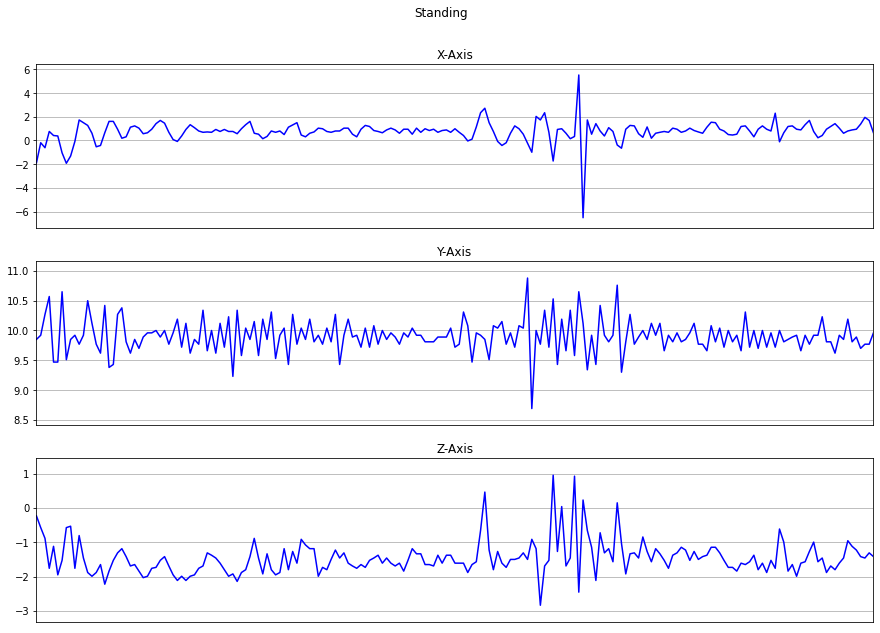

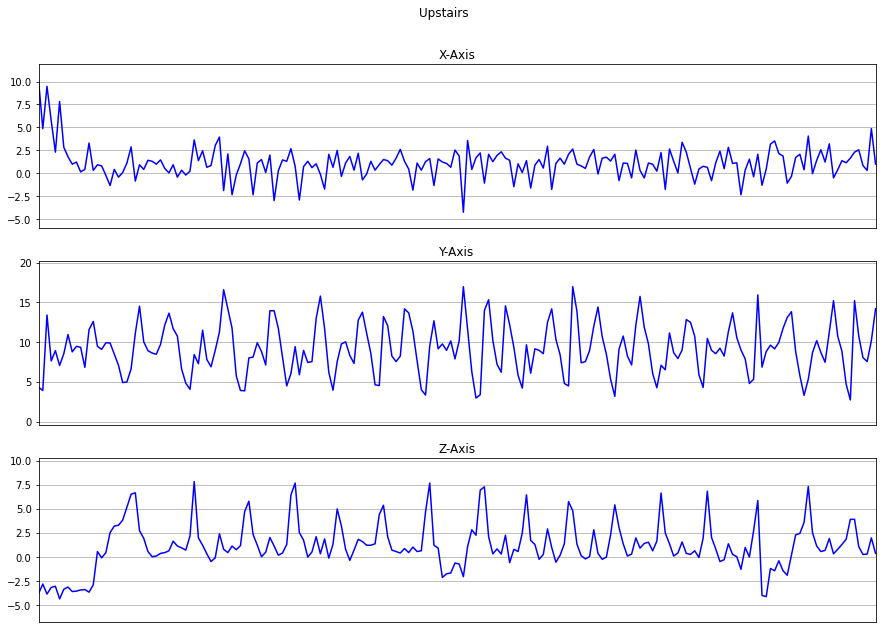

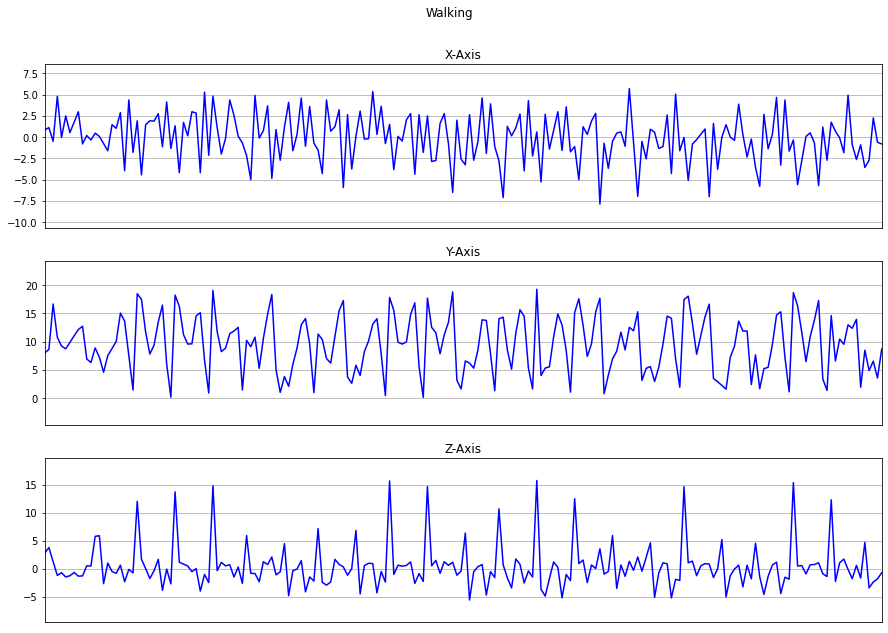

In [113]:
### 
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in np.unique(data['activity']):
    subset = data[data['activity'] == activity][:200]
    plot_activity(activity, subset)

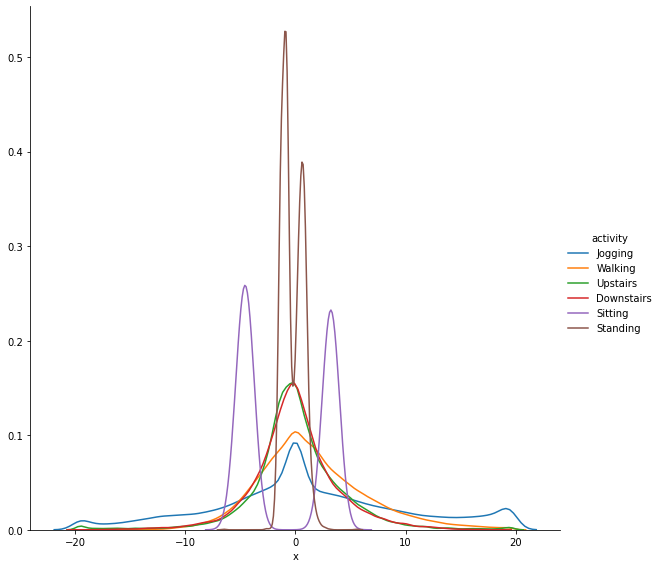

In [114]:
facetgrid = sns.FacetGrid(data = data, hue = "activity", size = 8)
facetgrid.map(sns.distplot, "x" ,hist = False).add_legend()
plt.show()

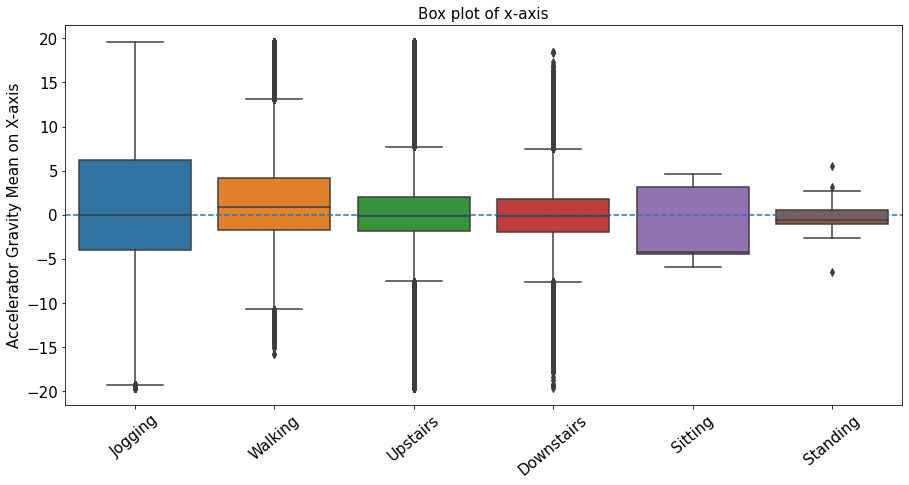

In [115]:
## Accelerator Gravity Mean on X-axis can be quite important
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity", y = "x", showfliers = True, data = data)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of x-axis", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

In [116]:
## drop "user", "time"
df = data.drop(["user", "time"], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [117]:
df['activity'].value_counts(dropna = False)

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [0]:
## Balancing dataset
Walking = df[df["activity"] == "Walking"].head(3555).copy()
Jogging = df[df["activity"] == "Jogging"].head(3555).copy()
Upstairs = df[df["activity"] == "Upstairs"].head(3555).copy()
Downstairs = df[df["activity"] == "Downstairs"].head(3555).copy()
Sitting = df[df["activity"] == "Sitting"].head(3555).copy()
Standing = df[df["activity"] == "Standing"].head(3555).copy()

In [119]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [120]:
balanced_data['activity'].value_counts(dropna = False)

Standing      3555
Jogging       3555
Downstairs    3555
Walking       3555
Sitting       3555
Upstairs      3555
Name: activity, dtype: int64

In [121]:
## Encode the "activity" column
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [122]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [123]:
## Seprate dependent variable and independent variables
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']
X.shape, y.shape

((21330, 3), (21330,))

In [124]:
## ## Scale 'x', 'y' and 'z'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X.head(10)

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
5,0.442677,0.041644,-0.925081,5
6,-0.083546,0.267510,-0.856263,5
7,0.245343,0.490718,-0.686242,5
8,0.574233,0.708612,-0.880552,5
9,-0.441670,0.820217,-0.868408,5


In [125]:
X, y

(array([[ 5.03429609e-04, -9.91902539e-02,  3.37933293e-01],
        [ 7.35899668e-02,  2.03858447e-02,  6.33446342e-01],
        [-3.61274948e-01,  1.58816023e+00, -1.03312182e-01],
        ...,
        [-6.28513500e-01,  1.97593426e-01,  2.61018941e-01],
        [-7.81443988e-01,  4.93221540e-02,  1.55767761e-01],
        [-8.00224925e-01,  2.67827186e-01,  4.75569499e-01]]), 597       5
 598       5
 599       5
 600       5
 601       5
          ..
 257318    3
 257319    3
 257320    3
 257321    3
 257322    3
 Name: label, Length: 21330, dtype: int64)

In [0]:
# from imblearn import under_sampling, over_sampling
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# def upsampling_data(X, y):
#     # Upsampling the training set
#     # Upsample using SMOTE
#     sm = SMOTE(sampling_strategy='auto', random_state=42)
#     X_sm, y_sm = sm.fit_sample(X, y)
    
#     print("Before SMOTE: ", Counter(y))
#     print("After SMOTE: ", Counter(y_sm))
#     return X_sm, y_sm


# X_sample, y_target = upsampling_data(X, y)

In [127]:
## Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17064, 3) (4266, 3) (17064,) (4266,)


In [128]:
x_train, y_train

(array([[ 0.64859022,  0.15272186, -0.18427464],
        [ 0.52307218,  0.32596903, -1.924968  ],
        [ 0.18687411, -0.42868855,  0.83990068],
        ...,
        [-0.17508802,  0.00445058, -0.12760093],
        [ 0.19418277, -0.07793225,  0.12338279],
        [ 0.55596114, -0.62266744, -0.47978771]]), 222683    2
 8738      5
 9538      5
 10253     5
 5682      1
          ..
 41877     0
 255641    3
 40956     4
 1903      0
 10078     5
 Name: label, Length: 17064, dtype: int64)

## Machine Learning Model Training and Tunning
- `Random Forest Classifier`
- `Support vector Machine`

In [0]:
from sklearn.ensemble import RandomForestClassifier ## Random Forest
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC ## Support Vector Machine
from sklearn.svm import LinearSVC ## Support Vector Machine
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [130]:

# Create the parameter grid based on the results of random search 
params_rf = {}
params_rf['bootstrap'] = [True]
params_rf['max_features'] = ['auto', 'sqrt']
params_rf['n_estimators'] = [100, 200]
print(params_rf)

params_svm = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
print(params_svm)

{'bootstrap': [True], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 200]}
[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [0]:
## Create model and Intiate gridsearch CV
# rf = GridSearchCV(RandomForestClassifier(), params_rf, cv = 5, n_jobs = -1)
# svm = GridSearchCV(SVC(), params_svm, cv=5)
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)
svm = LinearSVC(random_state=42, max_iter=200)


In [0]:
## create dictionary
clf = {'RF' : rf, 'SVM' : svm}

In [133]:
clf.keys()

dict_keys(['RF', 'SVM'])

In [134]:
clf.values()

dict_values([RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=200,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)])

In [0]:
def classify(X, y):
    for key in clf.keys():
        clf[key].fit(X, y)
        # final_model = clf[key].best_estimator_ ## Use the best hyperparameters

        # y_pred = final_model.predict(x_test)
        y_pred = clf[key].predict(x_test)
        y_pred_label = list(label.inverse_transform(y_pred))
        y_test_label = list(label.inverse_transform(y_test))

        class_report = classification_report(y_test_label, y_pred_label)
        conf_matrix = confusion_matrix(y_test_label, y_pred_label)

        print("Model Name:", key)
        print("Classification Report: \n", class_report)
        print("\nConfusion Matrix:\n", conf_matrix)
        print()
        print("\n")
        print("===============================================================")
        print("\n")

In [136]:
## classify
%%time 
classify(x_train, y_train)

Model Name: RF
Classification Report: 
               precision    recall  f1-score   support

  Downstairs       0.56      0.50      0.53       729
     Jogging       0.77      0.68      0.72       729
     Sitting       0.99      1.00      1.00       707
    Standing       0.96      0.97      0.96       705
    Upstairs       0.54      0.61      0.58       681
     Walking       0.66      0.71      0.68       715

    accuracy                           0.74      4266
   macro avg       0.75      0.75      0.75      4266
weighted avg       0.75      0.74      0.74      4266


Confusion Matrix:
 [[367  69   0   4 182 107]
 [ 82 496   0   5  79  67]
 [  0   0 705   0   2   0]
 [  3   2   0 683   8   9]
 [123  42   5  13 418  80]
 [ 82  34   0  10  80 509]]





Model Name: SVM
Classification Report: 
               precision    recall  f1-score   support

  Downstairs       0.21      0.02      0.04       729
     Jogging       0.10      0.07      0.08       729
     Sitting       0.25  

## Deep Learning and Neural Network
- `Convolution Neural Network - CNN`

### Frame Preparation

In [0]:
import scipy.stats as stats

In [0]:
Fs = 20
frame_size = Fs*4 # 4 seconds --- 80 samples X x, y, z = 240
hop_size = Fs*2 # 40 samples -- step size

In [0]:
### 

def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 3
    frames = []
   
    labels = []
    for i in range(0, len(df) - frame_size, hop_size): # [0 40 80 ... len(df) - 80]
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]

        ## Retrieve the most often used label in this segement
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        
        frames.append([x, y, z])
        labels.append(label)
    
    ## Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels


In [140]:
## Check
scaled_X['label'].value_counts()

5    3555
4    3555
3    3555
2    3555
1    3555
0    3555
Name: label, dtype: int64

In [141]:
X, y = get_frames(scaled_X, frame_size, hop_size)
# print(len(X[0:1]))
# print(X[0:1])
X.shape, y.shape


((532, 80, 3), (532,))

In [142]:
## Example
array = [[1, 2, 3], [7, 8, 9], [54, 78, 91], [85, 71, 80], [1, 2, 3], [7, 8, 9], [54, 78, 91], [85, 71, 80]]
# new_array = np.asarray(array)
new_array = np.asarray(array).reshape(-1, 2, 3)
print(new_array)
print(new_array.shape)

[[[ 1  2  3]
  [ 7  8  9]]

 [[54 78 91]
  [85 71 80]]

 [[ 1  2  3]
  [ 7  8  9]]

 [[54 78 91]
  [85 71 80]]]
(4, 2, 3)


In [143]:
## Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(x_train.shape, x_test.shape)
print(x_train.shape[0], x_test.shape[0])
print(x_train.shape[1], x_test.shape[1])
print(x_train.shape[2], x_test.shape[2])

(425, 80, 3) (107, 80, 3)
425 107
80 80
3 3


In [144]:
x_train[0].shape, x_test[0].shape

((80, 3), (80, 3))

In [145]:
## Reshapping train and test data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 3, 1)) ## 3 is no. features "x", "y", "z"
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 3, 1))
print(x_train.shape, x_test.shape)

(425, 80, 3, 1) (107, 80, 3, 1)


In [146]:
x_train[0].shape

(80, 3, 1)

In [147]:
(x_train.shape[1], 3, 1)

(80, 3, 1)

In [148]:
## 2D CNN Model

model = Sequential()
## #16 filters --- ## (2,2) kernel size
model.add(Conv2D(16, (2,2), activation='relu', input_shape = (x_train[0].shape)))
## 0.1 --- 10% of neurons
model.add(Dropout(0.1))


model.add(Conv2D(32, (2,2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 79, 2, 16)         80        
_________________________________________________________________
dropout_3 (Dropout)          (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 78, 1, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2496)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                159808    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [0]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [150]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/10
14/14 [==============================] - 0s 21ms/step - loss: 1.6427 - accuracy: 0.2682 - val_loss: 1.3561 - val_accuracy: 0.4673
Epoch 2/10
14/14 [==============================] - 0s 13ms/step - loss: 1.2775 - accuracy: 0.4682 - val_loss: 1.0522 - val_accuracy: 0.6729
Epoch 3/10
14/14 [==============================] - 0s 13ms/step - loss: 1.0151 - accuracy: 0.5953 - val_loss: 0.7581 - val_accuracy: 0.8692
Epoch 4/10
14/14 [==============================] - 0s 12ms/step - loss: 0.7784 - accuracy: 0.7482 - val_loss: 0.4858 - val_accuracy: 0.8785
Epoch 5/10
14/14 [==============================] - 0s 12ms/step - loss: 0.5593 - accuracy: 0.8071 - val_loss: 0.3478 - val_accuracy: 0.8879
Epoch 6/10
14/14 [==============================] - 0s 11ms/step - loss: 0.4404 - accuracy: 0.8541 - val_loss: 0.2996 - val_accuracy: 0.8879
Epoch 7/10
14/14 [==============================] - 0s 11ms/step - loss: 0.4040 - accuracy: 0.8565 - val_loss: 0.2570 - val_accuracy: 0.8785
Epoch 8/10
14

In [0]:
#### Plot

def plot_learningCurve(history, epochs):
    # plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()

     # plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper right')
    plt.show()

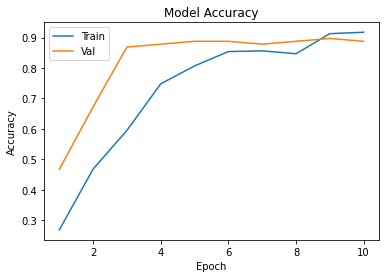

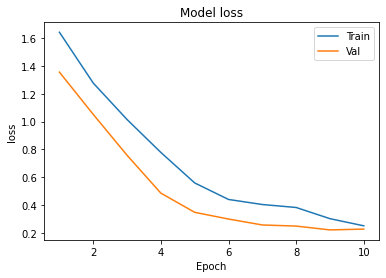

In [152]:
plot_learningCurve(history, 10)

### Confusion Matrix

In [0]:
### Confusion Matrix
# !pip install mlxtend


from sklearn.metrics import confusion_matrix

In [0]:

y_pred = model.predict_classes(x_test)

In [155]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[16  0  0  0  2  0]
 [ 0 17  0  0  0  1]
 [ 0  0 18  0  0  0]
 [ 0  0  0 18  0  0]
 [ 9  0  0  0  9  0]
 [ 0  0  0  0  0 17]]


In [0]:
## Plot Function
import numpy as np


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


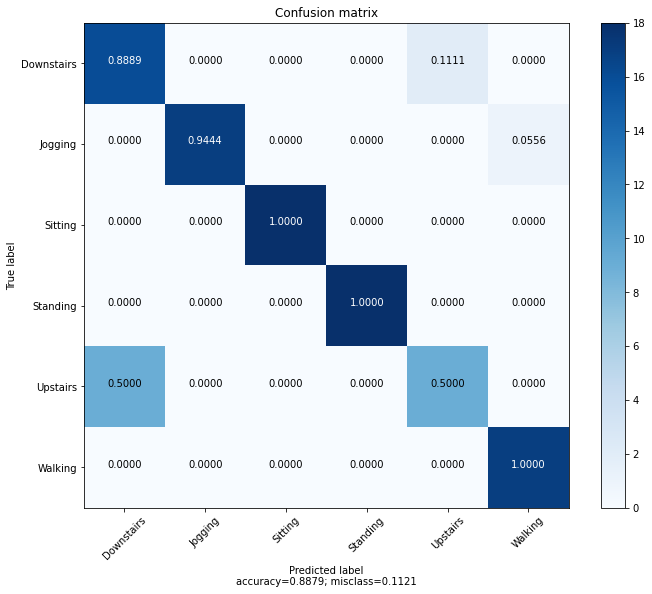

In [157]:
plot_confusion_matrix(cm = mat, target_names = label.classes_, title='Confusion matrix', cmap=None, normalize=True)

In [158]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_label = list(label.inverse_transform(y_pred))
y_test_label = list(label.inverse_transform(y_test))
print(classification_report(y_test_label, y_pred_label))

              precision    recall  f1-score   support

  Downstairs       0.64      0.89      0.74        18
     Jogging       1.00      0.94      0.97        18
     Sitting       1.00      1.00      1.00        18
    Standing       1.00      1.00      1.00        18
    Upstairs       0.82      0.50      0.62        18
     Walking       0.94      1.00      0.97        17

    accuracy                           0.89       107
   macro avg       0.90      0.89      0.88       107
weighted avg       0.90      0.89      0.88       107

